<a href="https://colab.research.google.com/github/Alkirk92/Andrea_Kirk-examples/blob/main/Andrea_Kirk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You will see data visualizations and statistical tests using sample data from my dissertation work.

-Andrea



#Load Libraries

In [1]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import BoundaryNorm, ListedColormap
import io
import itertools
import os
from pandas.core.reshape.pivot import pivot_table
from sqlalchemy.util import ordered_column_set
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import LogLocator
from matplotlib.ticker import FixedLocator
import matplotlib.ticker as ticker
import math

#Mount Drive

In [2]:
#mount googledrive
from google.colab import drive
drive.mount('/content/drive')

#os.lis`enter code here`tdir(file_path)
def myfunction(data):
  print(data)
file_path = 'drive/MyDrive/colab_files'

for file in os.listdir(file_path):
  if file.endswith(".csv"):
    myfunction(file)

Mounted at /content/drive
ALK.Mixed_infection-SSA02_GR02-H2-2021.12.7.2021 - format.csv
ALK.Mixed_infection-SSB01_GR02-CC7-2022.1.7 - Format.csv
2024.02.01_all_wells_proliferation - omit.csv
2024.04.09_allwells_cluster - sum_cluster.csv
2024.04.09_allwells_cluster - omitformat_plots (5).csv
2023.03.09_RECOUNT_ssb01.gr02_mix.infection.heat - cells_all_format.csv
2023.11.6_symbiodiniaceae_viability_ssb01_gr02_plate - Sheet1.csv
2023.07.11_viability_axenic_heat_symbiodiniaceae - Sheet2.csv
2023.03.09_RECOUNT_ssb01.gr02_mix.infection.heat - combined_cells (1).csv
2023.03.09_rates_mix_infections - ssb01_gr02_rates.csv
2023.04.26_Axenic.LHI-33_growth - Sheet2.csv
2024.02.01_all_wells_proliferation - omit_dissertation.csv
2023.03.09_rates_mix_infections - ccmp2556_gr02_rates.csv
2023.03.09_RECOUNT_ccmp2556.gr02_mix.infection.heat - combined_cells (1).csv
ALK.Mixed_infection-SSB01_GR02-CC7-2022.1.7 - omit_cluster_count.csv
2023.04.14_all_wells_proliferation - omit.csv
ALK.Mixed_infection-SSB01

#Heatmap File and Dataframes

In [3]:
#import .csv files and create df

Algae_quantification = pd.read_csv('drive/MyDrive/colab_files/Mixed_infection-SSB01-2021.07.14.tentacle.xlsx - format.csv')

print(Algae_quantification)


   Mixed  brown  green  Cluster  type  Mix02-w5-d4  Mix02-w5-d11  \
0      H      1      0        1    10     0.018966      0.048464   
1      H      0      1        1     1     0.187931      0.079863   
2      H      2      0        2    20     0.131034      0.184300   
3      M      1      1        2    11     0.000000      0.001365   
4      H      0      2        2     2     0.362069      0.234812   
5      H      3      0        3    30     0.093103      0.124915   
6      M      2      1        3    21     0.000000      0.002048   
7      M      1      2        3    12     0.000000      0.002048   
8      H      0      3        3     3     0.077586      0.071672   
9      H      4      0        4    40     0.062069      0.111945   
10     M      3      1        4    31     0.000000      0.000000   
11     M      2      2        4    22     0.000000      0.005461   
12     M      1      3        4    13     0.000000      0.002730   
13     H      0      4        4     4     0.0482

#Heatmap Example


---


Here, algae were counted during days of growth. The algae were grouped into clusters, and clusters could be divided into two types: "Type_1" and "Type_2" clusters. Each cluster could range in size from 1 to 8 algal cells.

In [4]:
#set heatmap settings

#maximum and minimum values to display
vmin = 0.001
vmax = 0.400

#tick marks
cbar_ticks = [0, 0.001, 0.002, 0.004, 0.008, 0.015, 0.03, 0.06, 0.125, 0.250, 0.400]
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ticks = {'ticks': cbar_ticks, "format": formatter}

#Log scale base 10
log_norm = LogNorm(vmin=vmin, vmax = vmax)

#colormap
map = sns.color_palette("Blues", as_cmap=True)

In [5]:
#format and identify data for heatmap

data=Algae_quantification

#lists columns in the .csv file
data.columns


Index(['Mixed', 'brown', 'green', 'Cluster', 'type', 'Mix02-w5-d4',
       'Mix02-w5-d11', 'Mix02-w5-d18', 'Mix02-w5-d25', 'Mix02-w5-d33',
       'Mix02-w5-d39', 'Mix02-w6-d4', 'Mix02-w6-d11', 'Mix02-w6-d18',
       'Mix02-w6-d25', 'Mix02-w6-d33', 'Mix02-w6-d39', 'Mix16-w7-d4',
       'Mix16-w7-d11', 'Mix16-w7-d18', 'Mix16-w7-d25', 'Mix16-w7-d33',
       'Mix16-w7-d39', 'Mix16-w8-d4', 'Mix16-w8-d11', 'Mix16-w8-d18',
       'Mix16-w8-d25', 'Mix16-w8-d33', 'Mix16-w8-d39'],
      dtype='object')

In [6]:
#take columns from .csv that you need for the replicates

columns = ['Mixed', 'brown', 'green', 'Cluster', 'type', 'Mix02-w5-d4',
       'Mix02-w5-d11', 'Mix02-w5-d18', 'Mix02-w5-d25', 'Mix02-w5-d33',
       'Mix02-w5-d39']

#Identify the days columns contining the percent values
days_percent = ['Mix02-w5-d4',
       'Mix02-w5-d11', 'Mix02-w5-d18', 'Mix02-w5-d25', 'Mix02-w5-d33',
       'Mix02-w5-d39']

#label the value in "days column" to percent
piv = pd.melt(data[columns], var_name='days', value_name = 'percent', id_vars=['Mixed', 'brown', 'green', 'Cluster', 'type'], value_vars= days_percent)
display(piv)

#make days label categorical for heatmap
piv['days'] = pd.Categorical(piv['days'], days_percent)

#Pull mixed and homogenous values
Type_2 = piv[piv.Mixed == 'M'].pivot_table(index=['Cluster'], columns = 'days', values=['percent'],  aggfunc= 'sum')
Type_1 = piv[piv.Mixed == 'H'].pivot_table(index=['Cluster'], columns = 'days', values=['percent'],  aggfunc= 'sum')
all = piv.pivot_table(index=['Cluster'], columns = 'days', values=['percent'],  aggfunc= 'sum')

display(Type_1)
display(Type_2)
display(all)


,Mixed,brown,green,Cluster,type,days,percent
0,H,1,0,1,10,Mix02-w5-d4,0.018966
1,H,0,1,1,1,Mix02-w5-d4,0.187931
2,H,2,0,2,20,Mix02-w5-d4,0.131034
3,M,1,1,2,11,Mix02-w5-d4,0.000000
4,H,0,2,2,2,Mix02-w5-d4,0.362069
...,...,...,...,...,...,...,...
259,M,4,4,8,44,Mix02-w5-d39,0.000000
260,M,3,5,8,35,Mix02-w5-d39,0.001198
261,M,2,6,8,26,Mix02-w5-d39,0.003595
262,M,1,7,8,17,Mix02-w5-d39,0.000000


percent                                                      \
days    Mix02-w5-d4 Mix02-w5-d11 Mix02-w5-d18 Mix02-w5-d25 Mix02-w5-d33   
Cluster                                                                   
1          0.206897     0.128328     0.086202     0.252121     0.189967   
2          0.493103     0.419113     0.286824     0.373333     0.433813   
3          0.170690     0.196587     0.173958     0.170909     0.164422   
4          0.110345     0.163823     0.265079     0.121212     0.139340   
5          0.008621     0.037543     0.062128     0.018182     0.027868   
6          0.010345     0.012287     0.048149     0.036364     0.022294   
7          0.000000     0.009556     0.012684     0.016970     0.009754   
8          0.000000     0.000000     0.006213     0.000000     0.000000   

                      
days    Mix02-w5-d39  
Cluster               
1           0.112343  
2           0.292391  
3           0.167615  
4           0.185141  
5           0.054673  
6           0.041342  
7           0.014679  
8           0.003595

percent                                                      \
days    Mix02-w5-d4 Mix02-w5-d11 Mix02-w5-d18 Mix02-w5-d25 Mix02-w5-d33   
Cluster                                                                   
2               0.0     0.001365     0.001553     0.002424     0.001858   
3               0.0     0.004096     0.003106     0.003636     0.002787   
4               0.0     0.008191     0.017603     0.004848     0.000000   
5               0.0     0.013652     0.009060     0.000000     0.002322   
6               0.0     0.000000     0.015532     0.000000     0.005574   
7               0.0     0.000000     0.003624     0.000000     0.000000   
8               0.0     0.005461     0.008284     0.000000     0.000000   

                      
days    Mix02-w5-d39  
Cluster               
2           0.004793  
3           0.026513  
4           0.029359  
5           0.023966  
6           0.021570  
7           0.013631  
8           0.008388

percent                                                      \
days    Mix02-w5-d4 Mix02-w5-d11 Mix02-w5-d18 Mix02-w5-d25 Mix02-w5-d33   
Cluster                                                                   
1          0.206897     0.128328     0.086202     0.252121     0.189967   
2          0.493103     0.420478     0.288377     0.375758     0.435671   
3          0.170690     0.200683     0.177064     0.174545     0.167209   
4          0.110345     0.172014     0.282682     0.126061     0.139340   
5          0.008621     0.051195     0.071188     0.018182     0.030190   
6          0.010345     0.012287     0.063681     0.036364     0.027868   
7          0.000000     0.009556     0.016309     0.016970     0.009754   
8          0.000000     0.005461     0.014497     0.000000     0.000000   

                      
days    Mix02-w5-d39  
Cluster               
1           0.112343  
2           0.297184  
3           0.194128  
4           0.214500  
5           0.078640  
6           0.062912  
7           0.028310  
8           0.011983

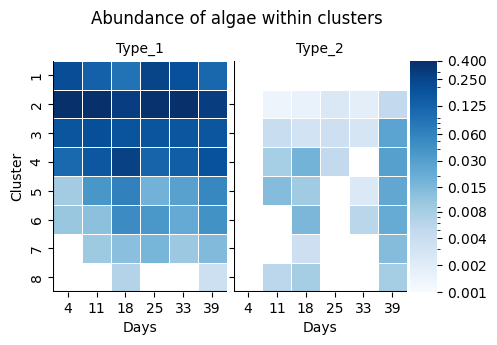

In [7]:
#set-up multipanel figure
fig1, ((ax1, ax2, cax1)) = plt.subplots (figsize=(5,3), ncols=3, nrows=1, sharex=False, sharey=False, gridspec_kw={'width_ratios': [1,1,0.15]})
fig1.subplots_adjust(wspace=0)

#Type_1  cluster panel
sns.heatmap(Type_1, cbar= False, ax=ax1, square=True, cmap = map, norm=log_norm, linewidths=0.5, linecolor='white', clip_on=False, vmin=vmin, vmax=vmax)
ax1.set_ylim(8,0)
ax1.set_xticklabels(["4", "11", "18", "25", "33", "39"], rotation = 0)
ax1.set_xlabel("Days")
ax1.set_title('Type_1', fontdict= {'fontsize' : 10})
ax1.axvline(0, color='black', linestyle="-")
ax1.axhline(8, color='black', linestyle="-")

#Type_2  cluster panel
sns.heatmap(Type_2, ax=ax2, cbar_ax=cax1, cbar_kws= ticks, square=True, cmap = map, norm=log_norm, linewidths=0.5, linecolor='white', clip_on=True, vmin=vmin, vmax=vmax)
ax2.set_ylim(7,-1)
ax2.set_ylabel("")
ax2.set_xticklabels(["4", "11", "18", "25", "33", "39"], rotation = 0)
ax2.set_yticklabels([" ", " ", " ", " ", " ", " ", " "])
ax2.set_title('Type_2', fontdict= {'fontsize' : 10})
ax2.set_xlabel("Days")

ax2.axvline(0, color='black', linestyle="-")
ax2.axhline(7, color='black', linestyle="-")

#set title
#fig.suptitle('Main title') # or plt.suptitle('Main title')
fig1.suptitle('Abundance of algae within clusters', y=1.05)

#Identify directory to save images
images_dir = '/content/drive/MyDrive/colab_files/IMAGES'

#save publication-quality figure
plt.savefig(f"{images_dir}/algal_quantification.pdf", dpi=300, bbox_inches = "tight")


#Growth Curve Example

Here, algae were grown in five conditions in both 12hr Light/ 12hr Dark and 24hr Dark. Three replicates were counted per media and light condition. Algae were quantified by cells/mL of media using a cell counter.

#Growth Curve Files and Dataframes

In [8]:
#Open .csv
Growth_conditions = pd.read_csv('drive/MyDrive/colab_files/2023.04.26_Axenic.LHI-33_growth - Sheet2.csv')


In [9]:
#Create df for Light and Dark conditions for "SSB01" algae
data = Growth_conditions

L = data[data.Type == 'Light']
D = data[data.Type == 'Dark']

Algae_1_L = L[L.Algae == 'SSB01']
#print(df_light_lhi33)

Algae_1_D = D[D.Algae == 'SSB01']

print(Algae_1_D)
print(Algae_1_L)

     day  Algae  Replicate      Condition  Type   cells/mL
75     0  SSB01          1       Dark-IMK  Dark    93800.0
76     0  SSB01          2       Dark-IMK  Dark    82100.0
77     0  SSB01          3       Dark-IMK  Dark   117000.0
78     0  SSB01          1        Dark-MB  Dark   117000.0
79     0  SSB01          2        Dark-MB  Dark   123000.0
..   ...    ...        ...            ...   ...        ...
445   28  SSB01          2   Dark-MB+5glc  Dark  1180000.0
446   28  SSB01          3   Dark-MB+5glc  Dark  1170000.0
447   28  SSB01          1  Dark-MB+10glc  Dark  1190000.0
448   28  SSB01          2  Dark-MB+10glc  Dark  1280000.0
449   28  SSB01          3  Dark-MB+10glc  Dark  1230000.0

[75 rows x 6 columns]
     day  Algae  Replicate       Condition   Type  cells/mL
60     0  SSB01          1       Light-IMK  Light   93800.0
61     0  SSB01          2       Light-IMK  Light   99700.0
62     0  SSB01          3       Light-IMK  Light  117000.0
63     0  SSB01          1   



> Seaborn, simple example



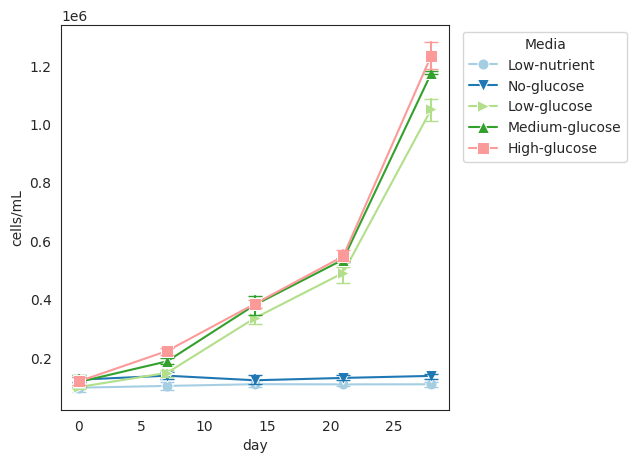

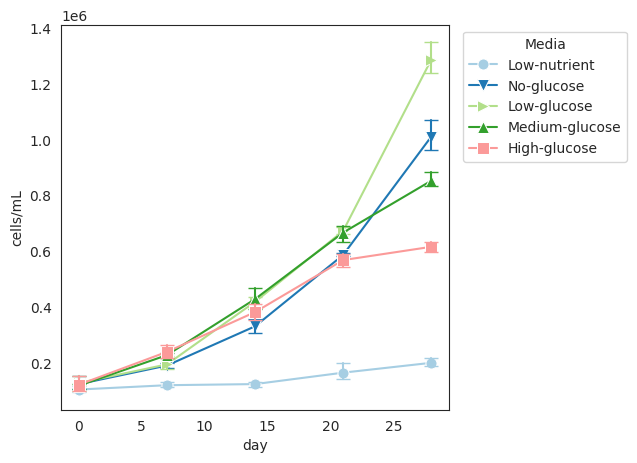

In [10]:
#Dark
plt.figure(figsize=(5,5))
sns.set_style("white")
Dark = sns.lineplot(x = "day", y = "cells/mL", dashes=False, hue="Condition", style="Condition", markers= ["o", "v", ">", "^", "s"], data=Algae_1_D, palette='Paired', err_style="bars", markersize=8,err_kws={'capsize':5})
#error bar caps https://stackoverflow.com/questions/53906229/set-the-capsize-in-seaborn-lineplot

#set legend location
Dark.legend(title = 'Media', bbox_to_anchor=(1.02, 1), labels=['Low-nutrient', 'No-glucose', 'Low-glucose','Medium-glucose', 'High-glucose'])

#save high-quality version of figure
plt.savefig('Growth_algae_1_Dark.pdf', dpi=300, bbox_inches = "tight")

plt.show()

#Light
plt.figure(figsize=(5,5))
sns.set_style("white")
Light = sns.lineplot(x = "day", y = "cells/mL", dashes=False, hue="Condition", style="Condition", markers= ["o", "v", ">", "^", "s"], data=Algae_1_L, palette='Paired', err_style="bars", markersize=8,err_kws={'capsize':5})

#set legend location
Light.legend(title = 'Media', bbox_to_anchor=(1.02, 1), labels=['Low-nutrient', 'No-glucose', 'Low-glucose','Medium-glucose', 'High-glucose'])

#save high-quality version of figure
plt.savefig('Growth_algae_1_Light.pdf', dpi=300, bbox_inches = "tight")
plt.show()



> Multipanel Example



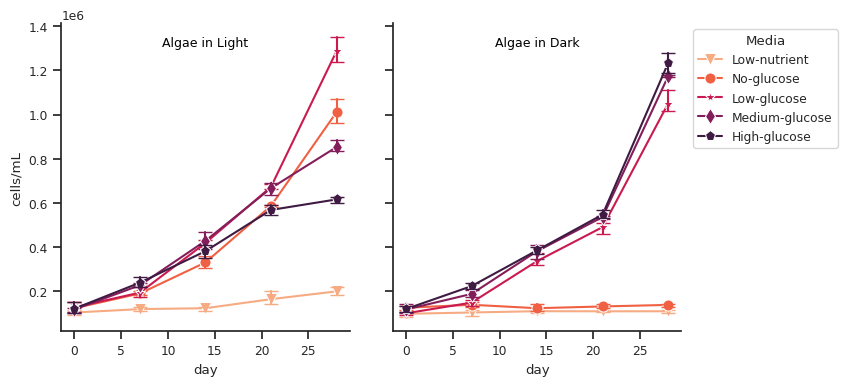

In [11]:
#make a multiplot figure to show light and dark growth in one figure

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=0.8)
#sns.axes_style({'grid.color':'#000000', 'axes.facecolor': '#020302'})

#Set multipanel figure
fig1, ((ax1, ax2)) = plt.subplots (figsize=(8,4), ncols=2, nrows=1, sharex=True, sharey=True, gridspec_kw={'width_ratios': [1,1]})
plt.subplots_adjust(wspace=0, hspace=0.05)
fig1.subplots_adjust(wspace=0.15)

#plot to each ax
a1 = sns.lineplot(ax=ax1, x = "day", y = "cells/mL", dashes=False, hue="Condition", style="Condition", markers=["v", "o", '*', 'd', 'p'], data=Algae_1_L, palette='rocket_r', err_style="bars", markersize=8,err_kws={'capsize':5})
a2 = sns.lineplot(ax=ax2, x = "day", y = "cells/mL", dashes=False, hue="Condition", style="Condition", markers=["v", "o", '*', 'd', 'p'], data=Algae_1_D, palette='rocket_r', err_style="bars", markersize=8,err_kws={'capsize':5})

#Set titles for each ax
ax1.set_title('Algae in Light', fontdict= {'fontsize' : 9}, y= 0.9, loc='center', color='black')
ax2.set_title('Algae in Dark', fontdict= {'fontsize' : 9}, y= 0.9, loc='center', color='black')

#remove partial borders
sns.despine(ax=ax2, bottom=False)
sns.despine(ax=ax1, bottom=False)

#Set legends
ax1.get_legend().remove()
ax2.legend(title = 'Media', bbox_to_anchor=(1.02, 1), labels=['Low-nutrient', 'No-glucose', 'Low-glucose','Medium-glucose', 'High-glucose'])

#save high-quality figure
plt.savefig('Algae_growth_1_all.pdf', dpi = 300, bbox_inches = "tight")

plt.show ()

#Barplot Example



> **Here, the same data from the "growth curve example" is used to compare the algal growth in "Low-glucose" on day 28 of growth**



In [12]:
#Data
#Create df for media conditions for "SSB01" algae

dark = Algae_1_D
Algae_1_D_low_nut= dark[dark.Condition == 'Dark-IMK']
Algae_1_D_No_glc= dark[dark.Condition == 'Dark-MB']
Algae_1_D_low_glc= dark[dark.Condition == 'Dark-MB+2glc']
Algae_1_D_med_glc= dark[dark.Condition == 'Dark-MB+5glc']
Algae_1_D_high_glc= dark[dark.Condition == 'Dark-MB+10glc']

print(Algae_1_D_No_glc)

light = Algae_1_L
Algae_1_L_low_nut= light[light.Condition == 'Light-IMK']
Algae_1_L_No_glc= light[light.Condition == 'Light-MB']
Algae_1_L_low_glc= light[light.Condition == 'Light-MB+2glc']
Algae_1_L_med_glc= light[light.Condition == 'Light-MB+5glc']
Algae_1_L_high_glc= light[light.Condition == 'Light-MB+10glc']

print(Algae_1_L_No_glc)


     day  Algae  Replicate Condition  Type  cells/mL
78     0  SSB01          1   Dark-MB  Dark  117000.0
79     0  SSB01          2   Dark-MB  Dark  123000.0
80     0  SSB01          3   Dark-MB  Dark  135000.0
168    7  SSB01          1   Dark-MB  Dark  135000.0
169    7  SSB01          2   Dark-MB  Dark  129000.0
170    7  SSB01          3   Dark-MB  Dark  152000.0
258   14  SSB01          1   Dark-MB  Dark  111000.0
259   14  SSB01          2   Dark-MB  Dark  117000.0
260   14  SSB01          3   Dark-MB  Dark  141000.0
348   21  SSB01          1   Dark-MB  Dark  129000.0
349   21  SSB01          2   Dark-MB  Dark  141000.0
350   21  SSB01          3   Dark-MB  Dark  123000.0
438   28  SSB01          1   Dark-MB  Dark  144000.0
439   28  SSB01          2   Dark-MB  Dark  129000.0
440   28  SSB01          3   Dark-MB  Dark  141000.0
     day  Algae  Replicate Condition   Type   cells/mL
63     0  SSB01          1  Light-MB  Light   111000.0
64     0  SSB01          2  Light-MB  Ligh

**We can look at growth in "Low Glucose" between light and dark conditions**

Text(0.5, 0.95, 'Growth in Low Glucose')

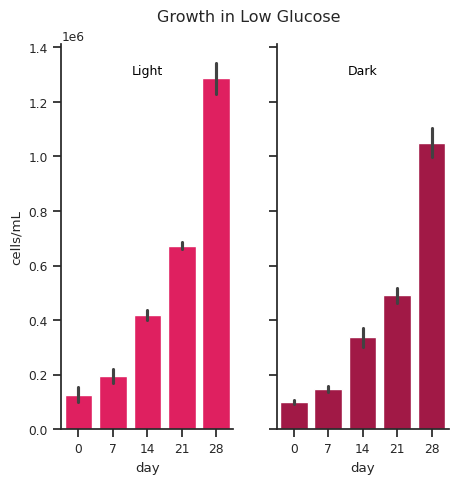

In [13]:
fig1, ((ax1, ax2)) = plt.subplots (figsize=(5,5), ncols=2, nrows=1, sharex=True, sharey=True, gridspec_kw={'width_ratios': [1,1]})
fig1.subplots_adjust(wspace=0.25)

sns.barplot(ax=ax1, data=Algae_1_L_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#FF0055'], errorbar="sd")
sns.barplot(ax=ax2, data=Algae_1_D_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#B8023F'], errorbar="sd")
ax1.get_legend().remove()
ax2.get_legend().remove()

#Set titles for each ax
ax1.set_title('Light', fontdict= {'fontsize' : 9}, y= 0.9, loc='center', color='black')
ax2.set_title('Dark', fontdict= {'fontsize' : 9}, y= 0.9, loc='center', color='black')

#title
fig1.suptitle('Growth in Low Glucose', y=0.95)




> **Take a closer look at day 28 in "Low Glucose" condition.**



Text(0.5, 0.95, 'Growth in Low Glucose')

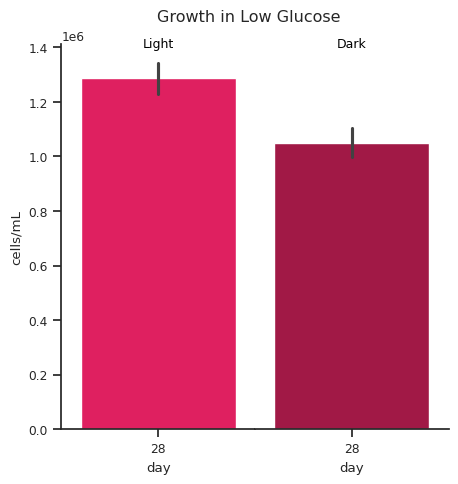

In [14]:
#Plot barplot for Day 28

fig1, ((ax1, ax2)) = plt.subplots (figsize=(5,5), ncols=2, nrows=1, sharex=True, sharey=True, gridspec_kw={'width_ratios': [1,1]})
fig1.subplots_adjust(wspace=0)

sns.barplot(ax=ax1, data=Algae_1_L_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#FF0055'], errorbar="sd")
sns.barplot(ax=ax2, data=Algae_1_D_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#B8023F'], errorbar="sd")
ax1.get_legend().remove()
ax2.get_legend().remove()

#Set titles for each ax
ax1.set_title('Light', fontdict= {'fontsize' : 9}, y= 0.97, loc='center', color='black')
ax2.set_title('Dark', fontdict= {'fontsize' : 9}, y= 0.97, loc='center', color='black')

#isolate d28
ax1.set_xlim(3.5,4.5)

sns.despine(ax=ax2, left=True)
ax2.tick_params(left=False)


#title
fig1.suptitle('Growth in Low Glucose', y=0.95)

#Statistical Test Example

**Is the algal density at day 28 significantly different between light and dark conditions when grown in "Low Glucose"?**

In [15]:
import scipy
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro


In [16]:
# Isolate samples from d28 for "Low Glucose" condition

Algae_1_L_low_glc_d28 = Algae_1_L_low_glc[Algae_1_L_low_glc.day == 28]

Algae_1_D_low_glc_d28 = Algae_1_D_low_glc[Algae_1_D_low_glc.day == 28]

#obtain only the cell counts for each sample
a = Algae_1_L_low_glc_d28['cells/mL']
b = Algae_1_D_low_glc_d28['cells/mL']



#Equal Variances





In [19]:
# define alpha
alpha = 0.05
# now we pass the groups and center value
# from the following
# ('trimmed mean', 'mean', 'median')
w_stats, p_value = levene(a, b,
                          center='mean')
print('statistic:', w_stats, 'p_value:', p_value)


statistic: 0.015444015444015856 p_value: 0.907093213225968


**This indicates that the variances are equal between the two populations being compared.**

#Normality


In [20]:
shapiro(a)


ShapiroResult(statistic=0.9355671405792236, pvalue=0.5098453167156991)

In [21]:
shapiro(b)

ShapiroResult(statistic=0.8928572535514832, pvalue=0.3631134967334426)

**We can see that p>0.05 for both samples, suggesting that we cannot reject the null. This means the data are likely normally distributed.**



> Therefore, we can go forward with parametric testing.

#Independent Samples t-test

One-tailed t-test

Here, we predict (Ha) that **samples grown in "LIGHT" have a signficantly higher cell density (cells/mL) than those in the "DARK".**

To test this hypothesis, we can use a **one-tailed t-test**



In [23]:
# Two-sided t-test to compare the cell counts between
#d28 "Low Glucose" samples between the Light and Dark

stat, pvalue = scipy.stats.ttest_ind(a, b, alternative='greater')

#Ha, Light condition has GREATER cells/mL than dark condition
print('test statistic:', stat, 'p_value:', pvalue)

test statistic: 5.277388438354882 p_value: 0.0030905386724831463


Here, we see that the p-value is < 0.05 for the one-tailed t-test, suggesting that **the algae in the LIGHT condition has a greater cell density than that grown in the DARK condition** on day 28 when supplemented with low glucose.

#Significance within plot

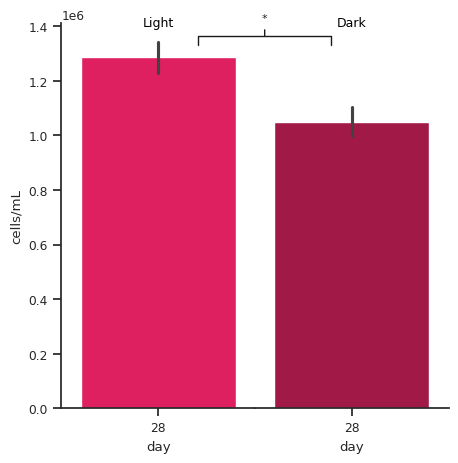

Text(0.5, 0.95, 'Growth in Low Glucose_with sig')

In [24]:
#Plot barplot for Day 28

fig1, ((ax1, ax2)) = plt.subplots (figsize=(5,5), ncols=2, nrows=1, sharex=True, sharey=True, gridspec_kw={'width_ratios': [1,1]})
fig1.subplots_adjust(wspace=0)

sns.barplot(ax=ax1, data=Algae_1_L_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#FF0055'], errorbar="sd")
sns.barplot(ax=ax2, data=Algae_1_D_low_glc, x = "day", y = "cells/mL", hue="Condition", palette=['#B8023F'], errorbar="sd")
ax1.get_legend().remove()
ax2.get_legend().remove()

#Set titles for each ax
ax1.set_title('Light', fontdict= {'fontsize' : 9}, y= 0.97, loc='center', color='black')
ax2.set_title('Dark', fontdict= {'fontsize' : 9}, y= 0.97, loc='center', color='black')

#isolate d28
ax1.set_xlim(3.5,4.5)

sns.despine(ax=ax2, left=True)
ax2.tick_params(left=False)


ax2.annotate('*', xy=(0.05, 0.96), xytext=(0.05, 1.00), xycoords='axes fraction',
            fontsize=8, ha='center', va='bottom',
            bbox=dict(boxstyle='square', fc='white', color='w'),
            arrowprops=dict(arrowstyle='-[, widthB=6.0, lengthB=0.8', lw=1.0, color='k'))


plt.show()


#title
fig1.suptitle('Growth in Low Glucose_with sig', y=0.95)

Alternative, two-tailed t-test

In [25]:
# Two-sided t-test to compare the cell counts between
#d28 "Low Glucose" samples between the Light and Dark

stat, pvalue = scipy.stats.ttest_ind(a, b)

print('test statistic:', stat, 'p_value:', pvalue)


test statistic: 5.277388438354882 p_value: 0.006181077344966293


Here, the p-value is < 0.05, indicating that there is a significant difference between algae grown in low glucose in the light vs. dark.